In [1]:
import tensorflow as tf
import numpy as np
import input_data

In [2]:
session = tf.InteractiveSession()

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x = tf.placeholder('float', shape=[None, 784])
y_ = tf.placeholder('float', shape=[None, 10])
keep_prob = tf.placeholder('float')

In [5]:
S = 28
D = S*S
N = 10

In [6]:
x_image = tf.reshape(x, [-1, S, S, 1])

In [7]:
h_W = x_image
h_W_drop = tf.nn.dropout(h_W, keep_prob)
for i in range(1, N):
    shape = [3, 3, i, i + 1]
    W = tf.Variable(tf.truncated_normal(shape, stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[i + 1]))
    h_W = (tf.nn.elu if i < 9 else tf.nn.tanh)(tf.nn.conv2d(h_W_drop, W, strides=[1, 1, 1, 1], padding='SAME') + b)
    h_W_drop = tf.nn.dropout(h_W, keep_prob)

In [8]:
W = tf.transpose(tf.reshape(h_W_drop, [-1, D, N]), perm=[0, 2, 1])
b = tf.Variable(tf.constant(0.1, shape=[10]))
drop = tf.nn.dropout(tf.expand_dims(x, 2), keep_prob)
y_conv = tf.nn.softmax(tf.squeeze(tf.batch_matmul(W, drop) + b))

In [9]:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv + 1e-9))
global_step = tf.Variable(0, trainable=False)
learning_rate = 1e-2 #tf.train.exponential_decay(1e-2, global_step, 4000, 0.2, staircase=True)
train_step = tf.train.AdagradOptimizer(learning_rate).minimize(cross_entropy, global_step=global_step)
session.run(tf.initialize_all_variables())
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
for i in range(30000):
    batch = mnist.train.next_batch(50)
    if 0 == i % 100:
        train_accuracy = accuracy.eval(feed_dict={
                x: batch[0],
                y_: batch[1],
                keep_prob: 1.0,
            })
        print('step %d, learning_rate %g, training accuracy %g' % (session.run(global_step), learning_rate, train_accuracy))
    tf.Print(cross_entropy, [cross_entropy], "Cross-entropy: ")
    train_step.run(feed_dict={
            x: batch[0],
            y_: batch[1],
            keep_prob: 0.93,
        })
print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images,
        y_: mnist.test.labels,
        keep_prob: 1.0,
    }))

step 0, learning_rate 0.01, training accuracy 0.14
step 100, learning_rate 0.01, training accuracy 0.12
step 200, learning_rate 0.01, training accuracy 0.24
step 300, learning_rate 0.01, training accuracy 0.44
step 400, learning_rate 0.01, training accuracy 0.52
step 500, learning_rate 0.01, training accuracy 0.48
step 600, learning_rate 0.01, training accuracy 0.62
step 700, learning_rate 0.01, training accuracy 0.66
step 800, learning_rate 0.01, training accuracy 0.6
step 900, learning_rate 0.01, training accuracy 0.56
step 1000, learning_rate 0.01, training accuracy 0.64
step 1100, learning_rate 0.01, training accuracy 0.7
step 1200, learning_rate 0.01, training accuracy 0.76
step 1300, learning_rate 0.01, training accuracy 0.7
step 1400, learning_rate 0.01, training accuracy 0.72
step 1500, learning_rate 0.01, training accuracy 0.78
step 1600, learning_rate 0.01, training accuracy 0.76
step 1700, learning_rate 0.01, training accuracy 0.78
step 1800, learning_rate 0.01, training acc

In [10]:
failed_predictions = mnist.test.images[correct_prediction.eval(feed_dict={
        x: mnist.test.images,
        y_:mnist.test.labels,
        keep_prob: 1.0,
    }) == False]

In [11]:
mnist.test.images[0].shape

(784,)

In [12]:
import matplotlib
import matplotlib.pyplot
%matplotlib inline

In [13]:
images = {
    0: mnist.test.images[3],
    1: mnist.test.images[2],
    2: mnist.test.images[1],
    3: mnist.test.images[30],
    4: mnist.test.images[4],
    5: mnist.test.images[15],
    6: mnist.test.images[11],
    7: mnist.test.images[0],
    8: mnist.test.images[61],
    9: mnist.test.images[9],
}

/home/robert/code/notebook/python/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


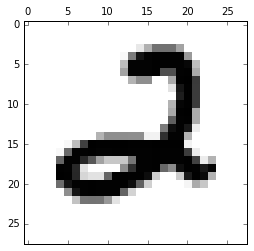

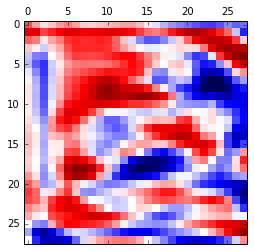

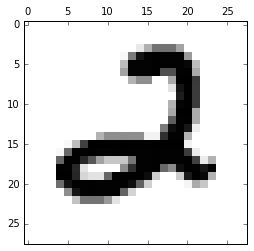

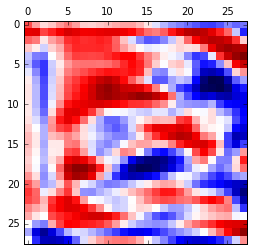

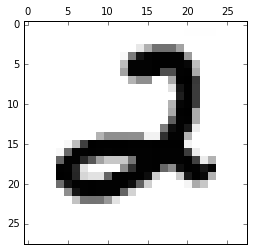

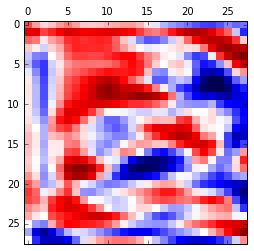

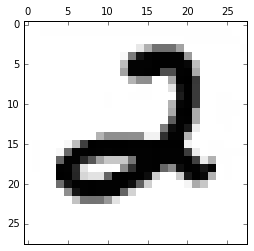

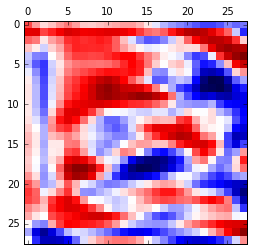

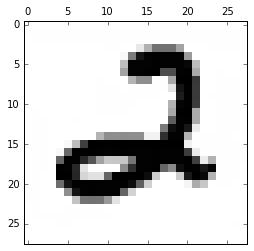

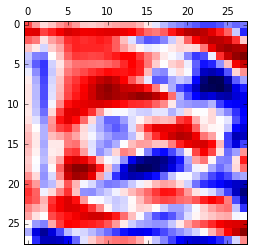

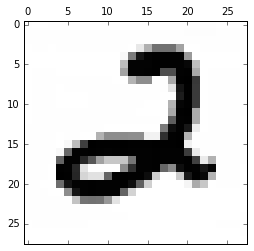

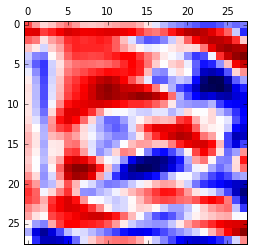

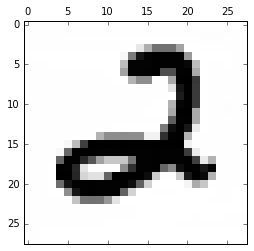

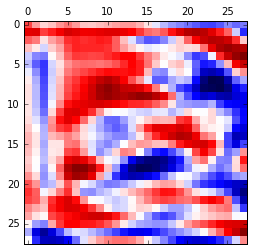

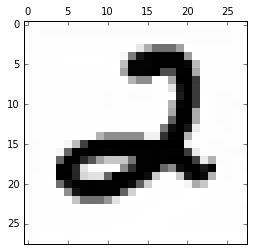

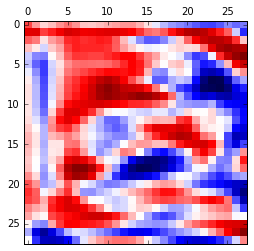

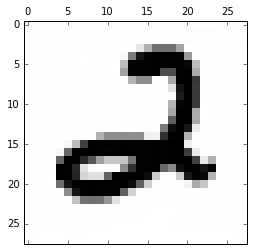

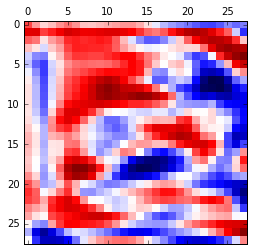

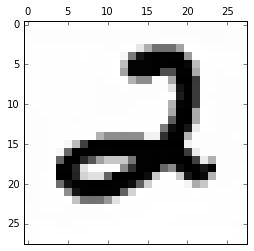

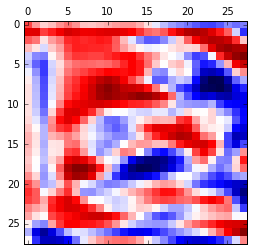

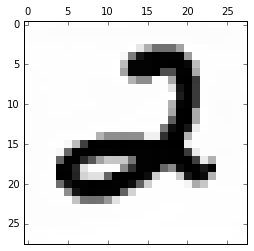

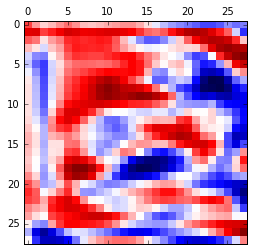

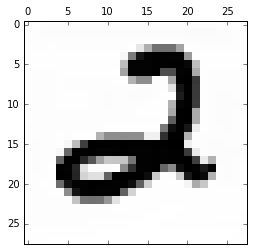

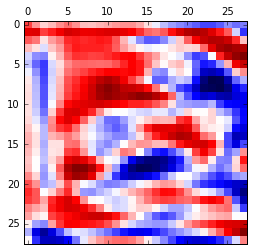

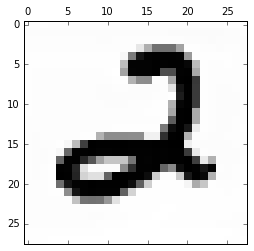

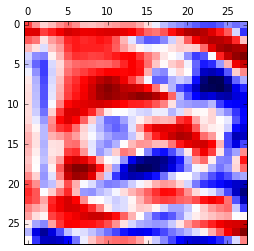

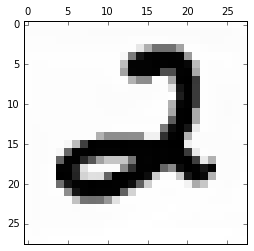

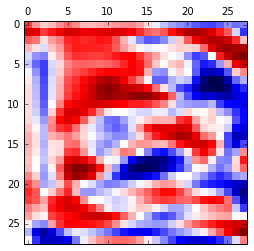

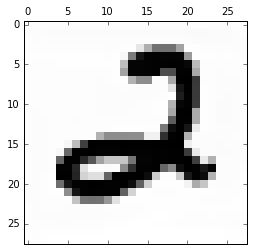

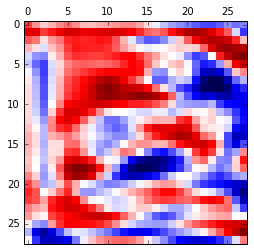

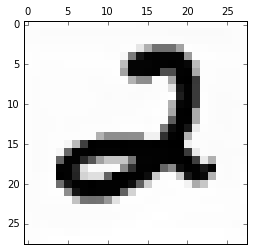

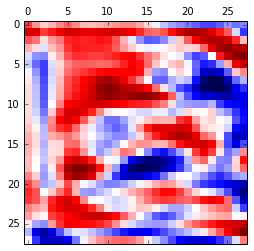

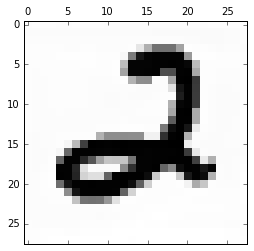

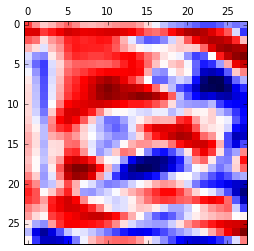

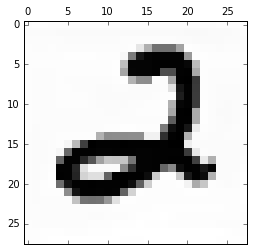

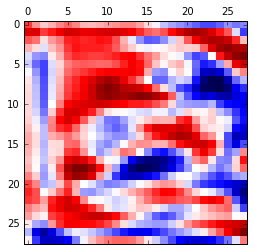

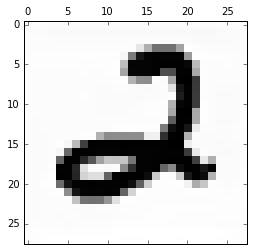

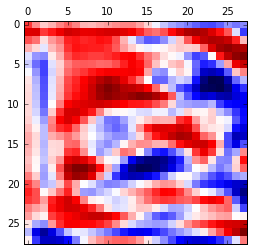

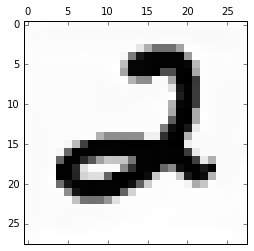

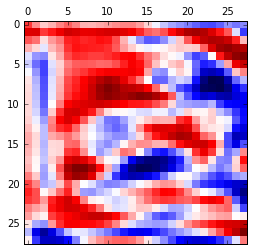

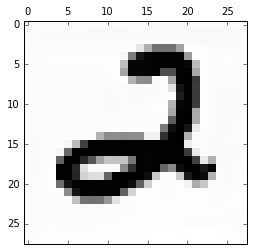

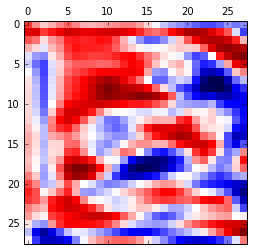

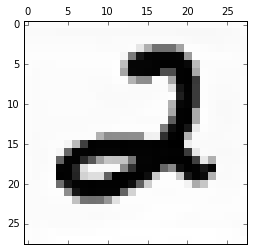

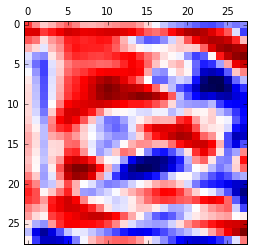

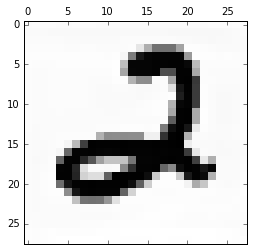

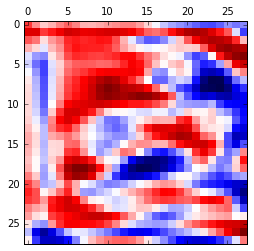

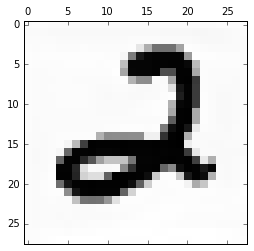

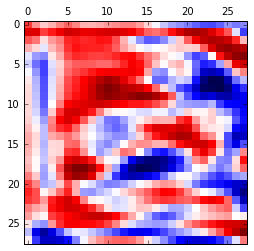

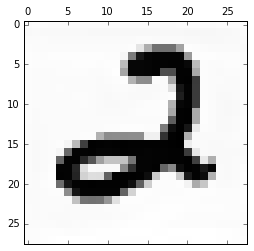

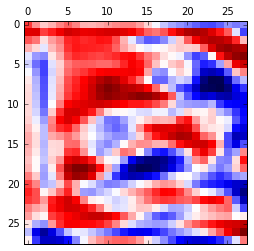

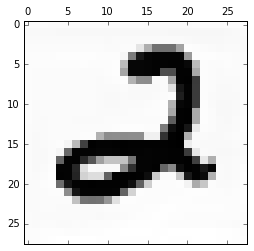

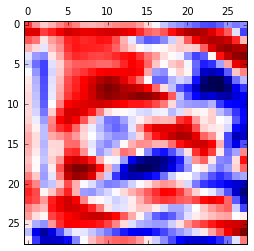

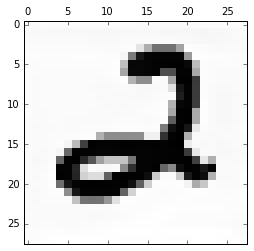

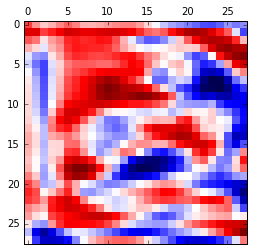

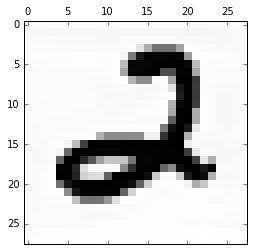

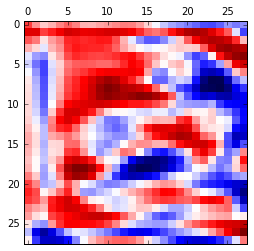

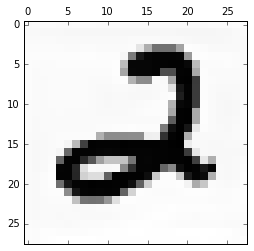

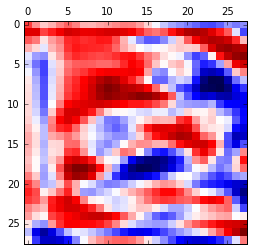

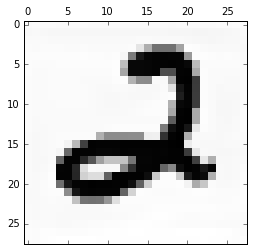

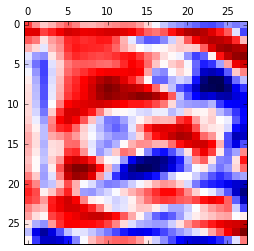

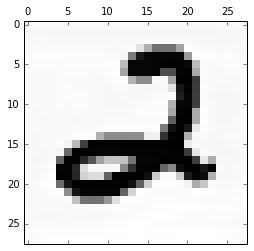

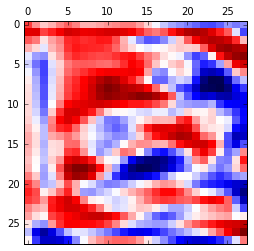

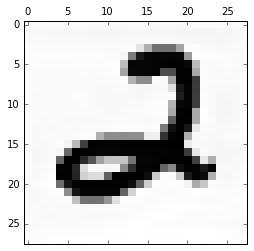

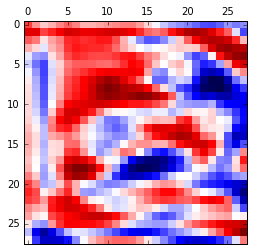

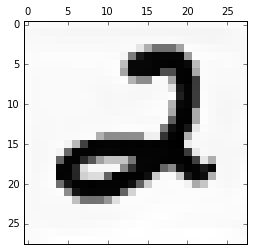

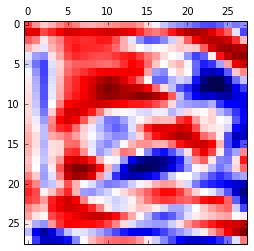

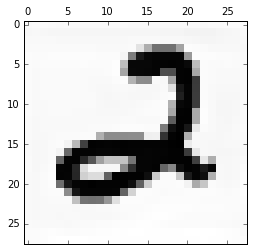

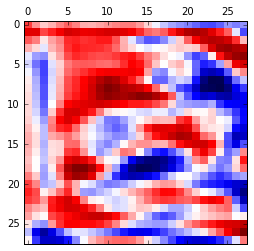

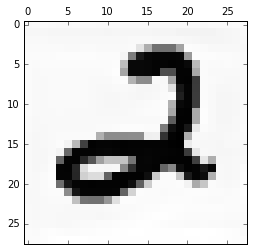

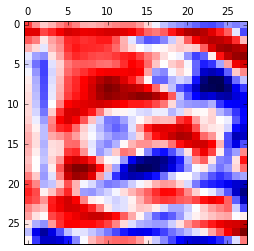

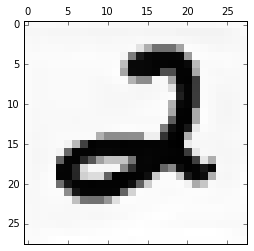

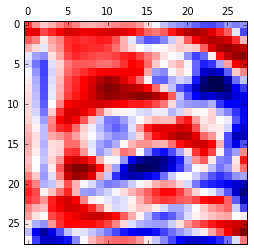

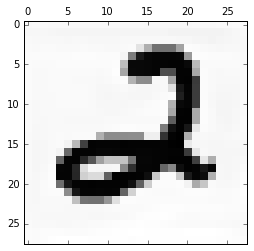

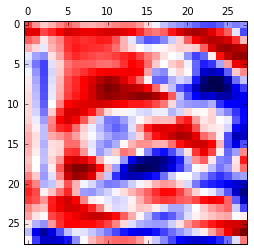

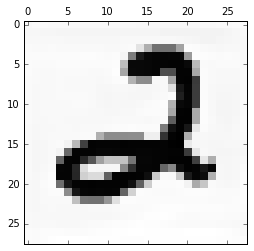

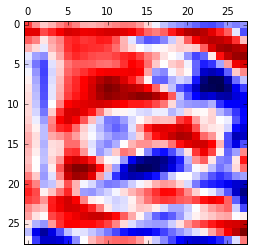

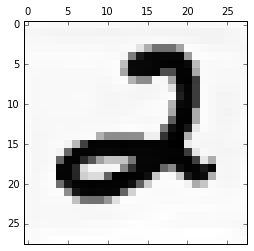

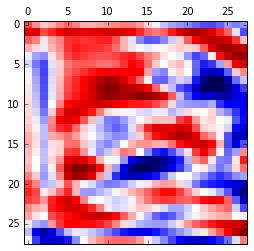

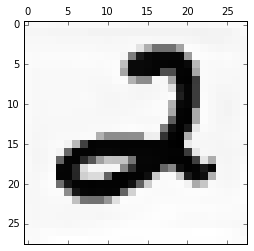

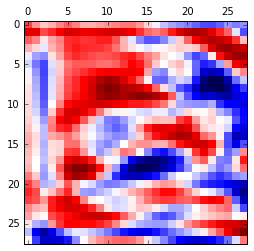

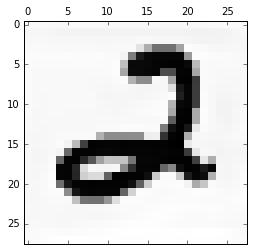

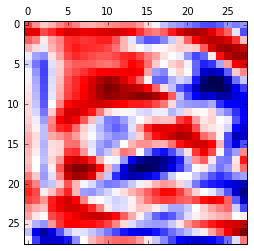

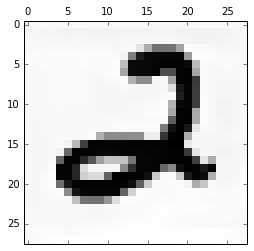

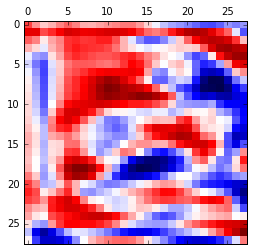

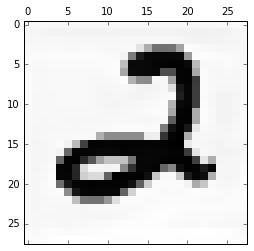

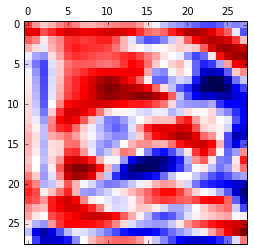

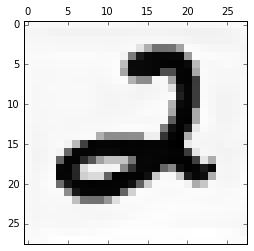

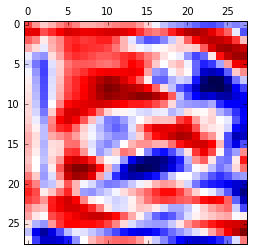

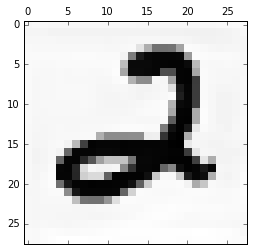

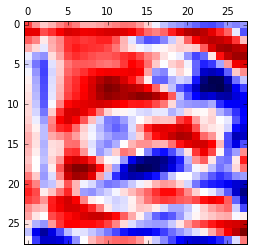

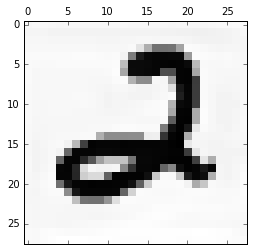

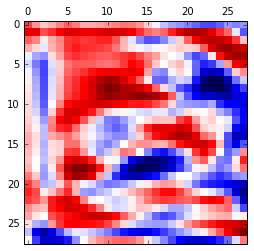

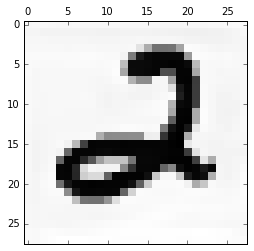

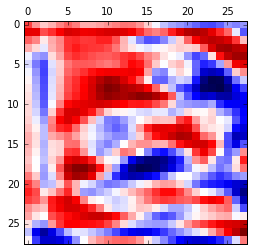

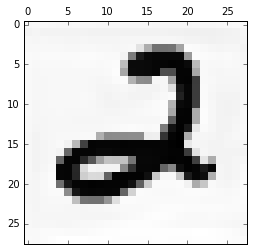

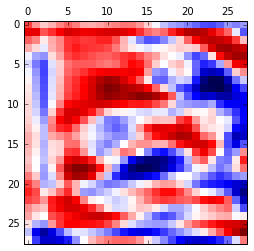

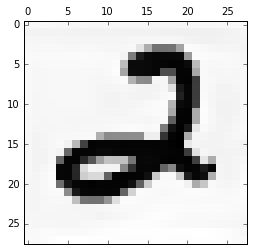

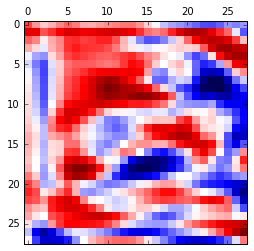

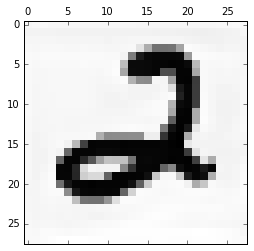

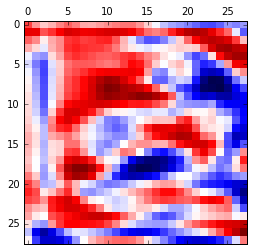

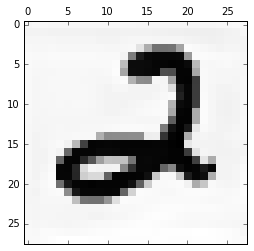

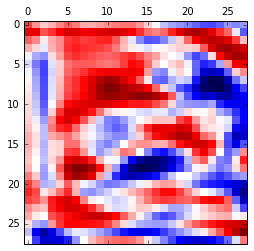

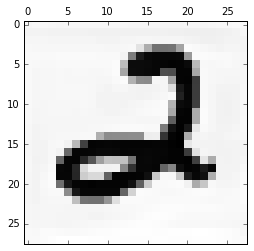

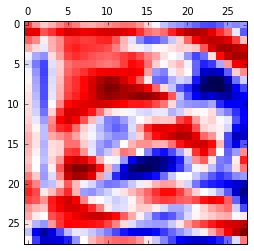

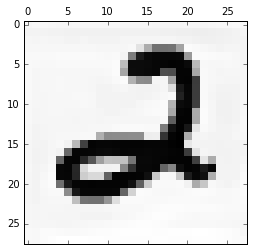

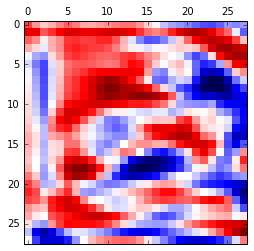

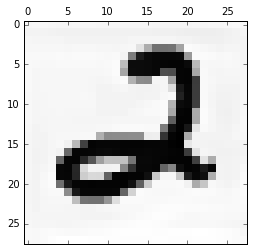

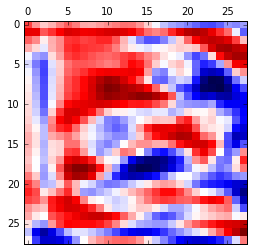

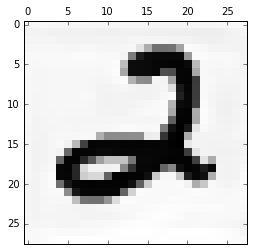

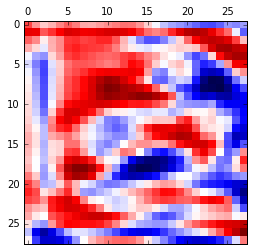

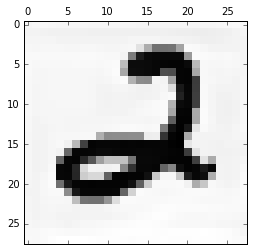

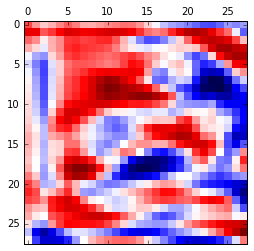

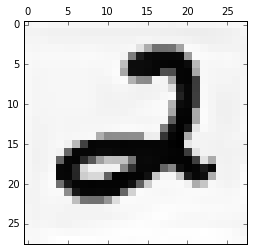

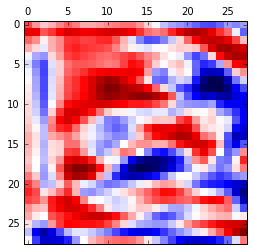

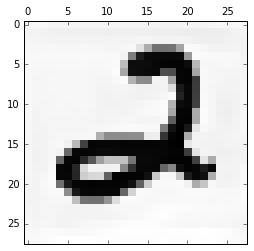

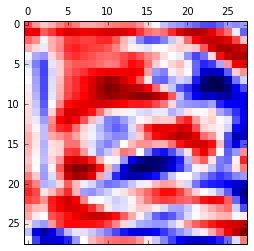

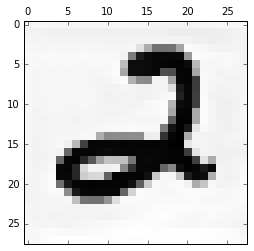

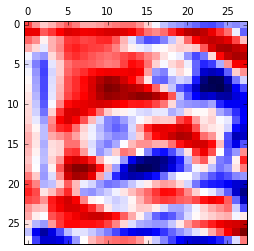

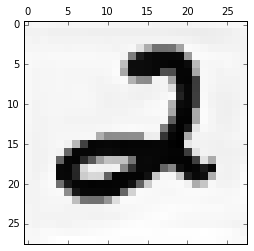

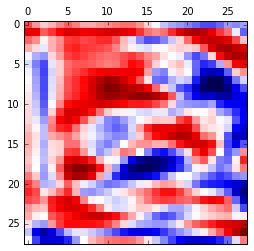

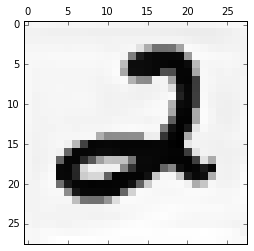

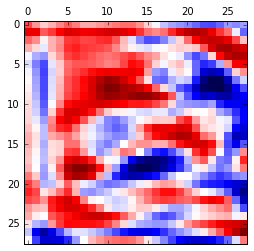

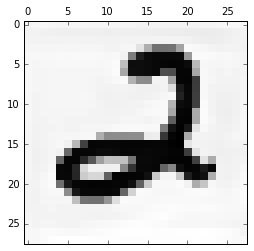

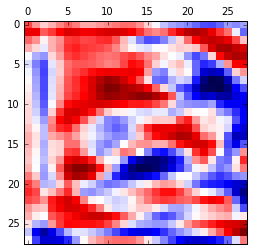

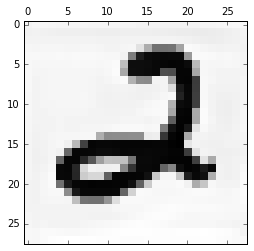

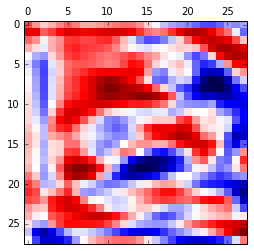

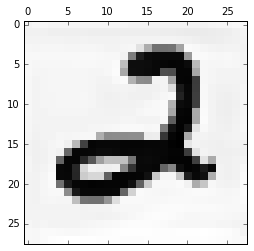

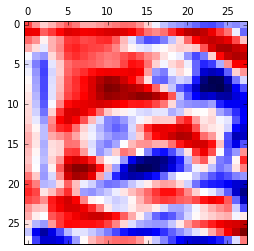

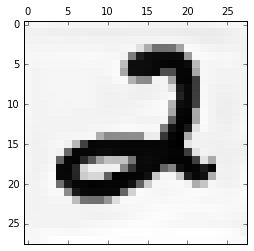

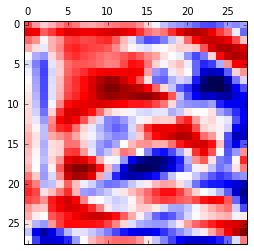

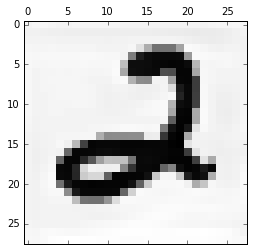

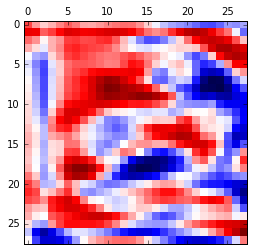

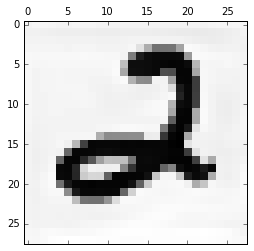

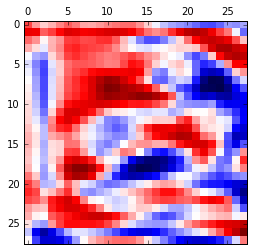

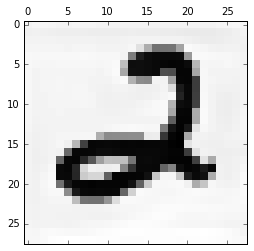

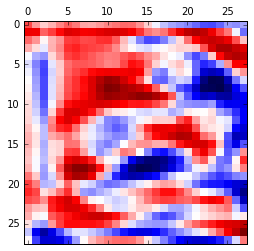

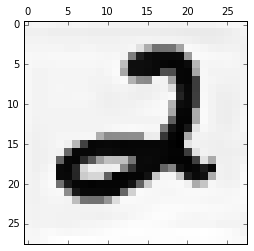

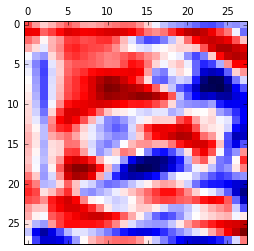

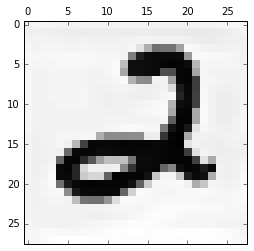

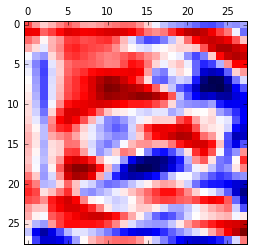

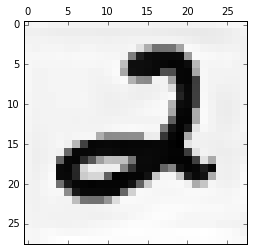

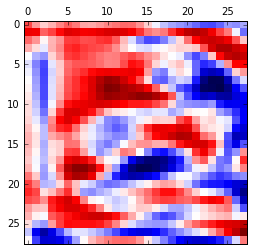

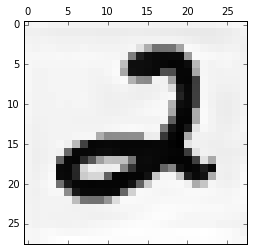

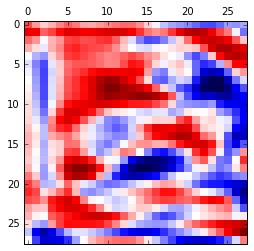

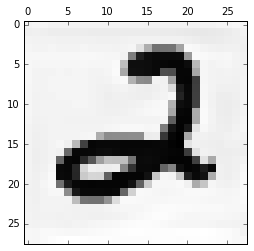

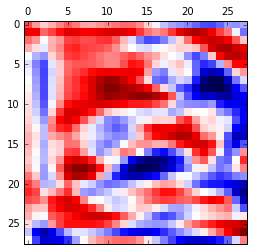

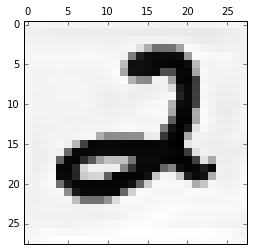

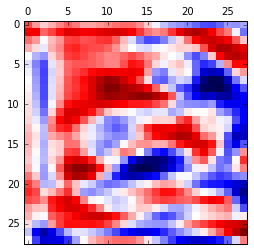

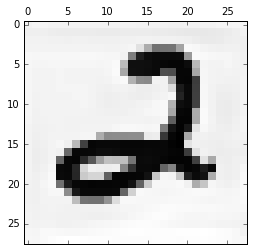

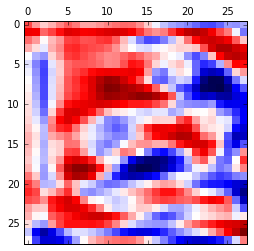

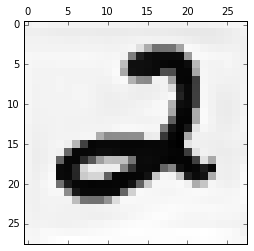

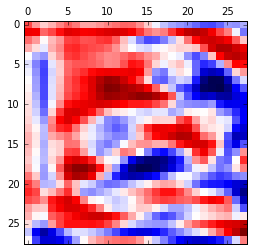

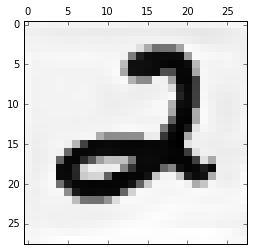

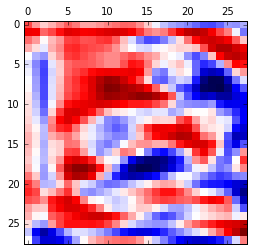

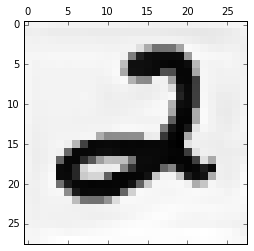

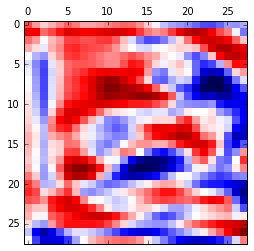

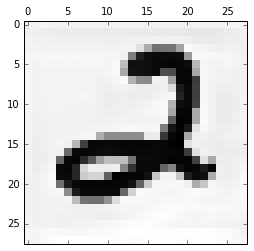

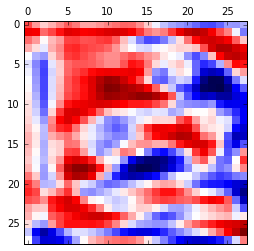

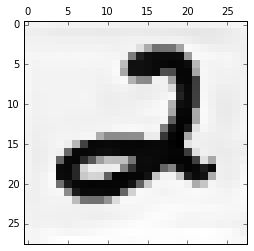

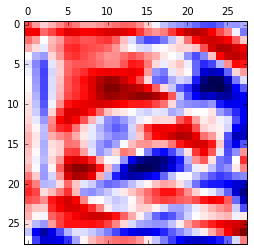

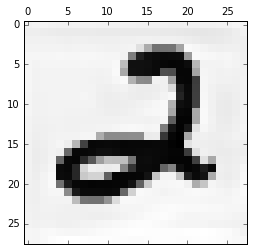

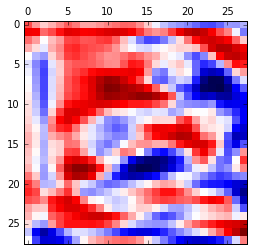

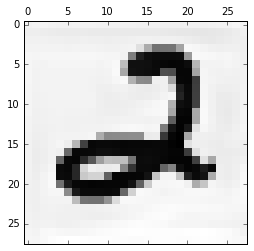

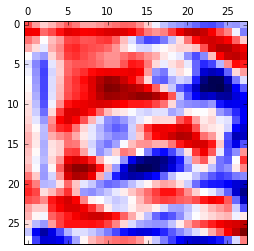

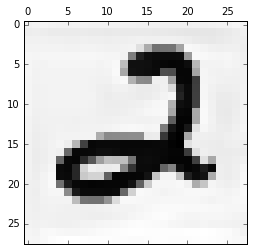

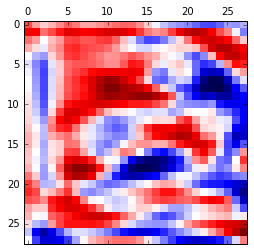

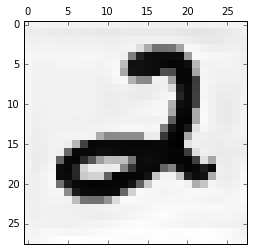

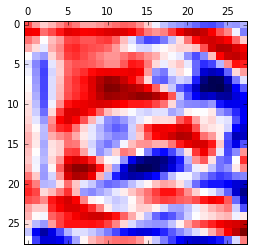

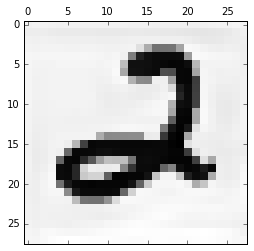

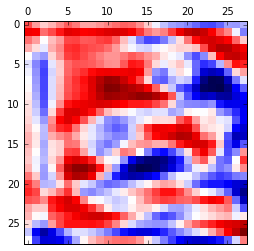

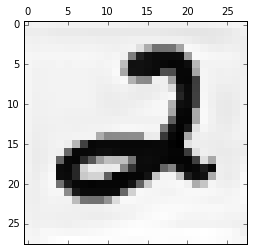

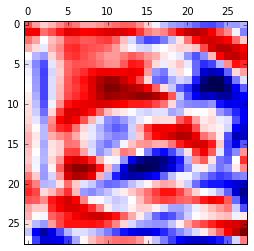

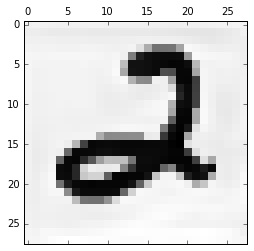

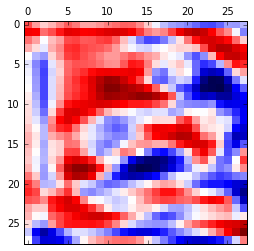

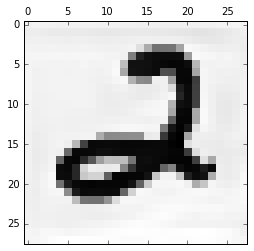

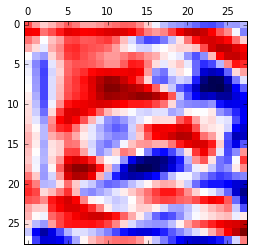

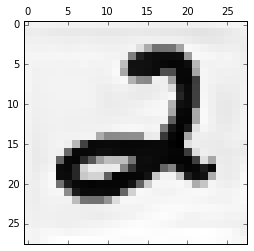

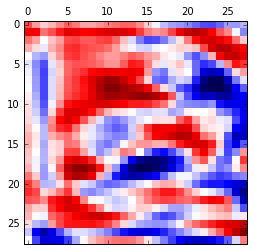

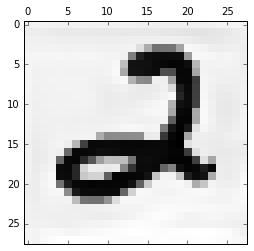

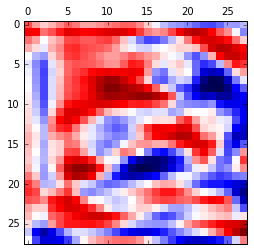

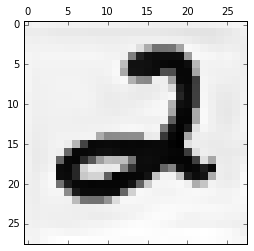

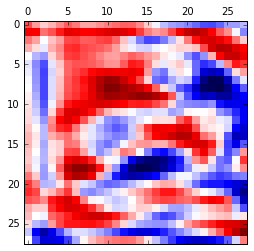

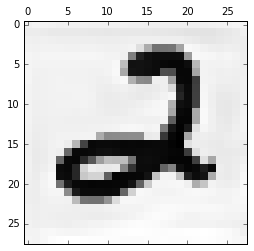

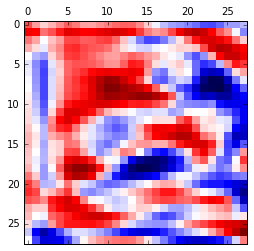

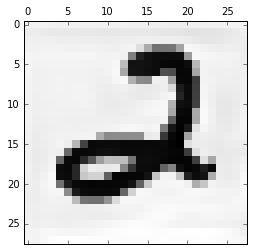

In [ ]:
COLORMAP = matplotlib.pyplot.cm.gray
batch = list(mnist.train.next_batch(50))
digit = batch[0][0]
for i in range(100):
    image = np.reshape(digit, (28, 28))
    results = W.eval(feed_dict={x: [digit], keep_prob: 1.0})
    result = np.reshape(results[0], (10, 28, 28))
    digit += 1e-3 * results[0][0]
    matplotlib.pyplot.matshow(-image, cmap=COLORMAP)
    matplotlib.pyplot.matshow(result[1], cmap=matplotlib.pyplot.cm.seismic)